<a href="https://colab.research.google.com/github/mustaphakamal/MLProject-/blob/main/Group6_BrownGazelles_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 6 (Marina & Feras) - Option A - Sentiment Analysis - Amazon Musical Instruments**

***Option A - Sentiment Analysis***

Columns below:

**marketplace**: Identifies **the** country or market the reviews are from.


**customer_id**: Identifies a unique ID number assigned to a customer.


**review_id**: Identifies a unique number assigned to each review.


**product_id**: Identifies a unique number assigned to each product.


**product_parent**: Identifies reviews for the same product.


**product_title**: Identifies the product's brand name and model number for each model.


**product_category**: Identifies the category for the product.


**star_rating**: Identifies the rating for each product and model (1 being the lowest rating, and 5 being the highest rating).


**helpful_votes**: Identifies the numeber of helpful votes.


**total_votes**: Identifies number of total votes reviewed.


**vine**: Review was written as part of the Vine program (from the most trusted reviewers on Amazon).


**verified_purchase**: The review is on a verified purchase.


**review_headline**: The title of the review.


**review_body**: Identifies the qualitative part of the review, written directly by the customers.


**review_date**: Identifies the date the review was written.

In [ ]:
#Import Libraries
import pandas as pd

In [ ]:
#Download product reviews from Amazonn Data sets - we chose Musical Instruments
!curl -O https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184M  100  184M    0     0  34.4M      0  0:00:05  0:00:05 --:--:-- 38.3M


In [ ]:
!ls

amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz  sample_data


In [ ]:
#Read the content of the data set
!echo "y" | gzip -d amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz

In [ ]:
#Create/Assign the Dataset
df = pd.read_table('amazon_reviews_us_Musical_Instruments_v1_00.tsv', delim_whitespace=False, error_bad_lines=False, nrows=1000)


In [ ]:
#Check the Dataset (1)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,45610553,RMDCHWD0Y5OZ9,B00HH62VB6,618218723,AGPtek® 10 Isolated Output 9V 12V 18V Guitar P...,Musical Instruments,3,0,1,N,N,Three Stars,"Works very good, but induces ALOT of noise.",2015-08-31
1,US,14640079,RZSL0BALIYUNU,B003LRN53I,986692292,Sennheiser HD203 Closed-Back DJ Headphones,Musical Instruments,5,0,0,N,Y,Five Stars,Nice headphones at a reasonable price.,2015-08-31
2,US,6111003,RIZR67JKUDBI0,B0006VMBHI,603261968,AudioQuest LP record clean brush,Musical Instruments,3,0,1,N,Y,Three Stars,removes dust. does not clean,2015-08-31
3,US,1546619,R27HL570VNL85F,B002B55TRG,575084461,Hohner Inc. 560BX-BF Special Twenty Harmonica,Musical Instruments,5,0,0,N,Y,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,2015-08-31
4,US,12222213,R34EBU9QDWJ1GD,B00N1YPXW2,165236328,Blue Yeti USB Microphone - Blackout Edition,Musical Instruments,5,0,0,N,Y,Five Stars,This is an awesome mic!,2015-08-31


In [ ]:
#Check the Dataset (2)
df.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
995,US,2463093,R260547RTKGO4J,B004X4UZB8,757819581,Rode Micro Boom Pole Telescopic Microphone Ext...,Musical Instruments,4,0,0,N,Y,Its OK,A little noisy when fully extended but not a b...,2015-08-31
996,US,22104665,RG7T7A61J9MQD,B0092LWHI6,106972836,1set BM-06 Locking Tune-o-matic Guitar Bridge ...,Musical Instruments,2,0,0,N,Y,Two Stars,Meh... When I saw it I decided not to put it o...,2015-08-31
997,US,40897975,R1KBNAVKXI60FI,B000A1BMLA,63687537,Universal Percussion Pro 4 DMC500 Nylon Standa...,Musical Instruments,5,0,0,N,Y,Five Stars,Great for storing drums!,2015-08-31
998,US,11699327,R6MLMX44ZKF29,B000ML4KT4,537770028,Ortofon Spherical Pro S Stylus,Musical Instruments,5,0,0,N,Y,Five Stars,Thank you for your timely delivery! I received...,2015-08-31
999,US,1708928,R37U5LU8X6EBFA,B009LL32B8,364913873,Acoustic Guitar Accessory Pack with Pick Holde...,Musical Instruments,5,0,0,N,Y,Five Stars,Perfect. Everything is as described,2015-08-31


In [ ]:
#Check the Dataset (3)
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2.457006e+07,4.755987e+08,4.301000,0.594000,0.860000
std,1.675611e+07,2.883340e+08,1.232038,2.537243,3.101293
min,6.949300e+04,1.795492e+06,1.000000,0.000000,0.000000
25%,1.096511e+07,2.084465e+08,4.000000,0.000000,0.000000
50%,2.276876e+07,4.757526e+08,5.000000,0.000000,0.000000
75%,4.115280e+07,7.295131e+08,5.000000,0.000000,1.000000
max,5.309027e+07,9.998384e+08,5.000000,47.000000,61.000000


In [ ]:
#Check the Dataset (4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        1000 non-null   object
 1   customer_id        1000 non-null   int64 
 2   review_id          1000 non-null   object
 3   product_id         1000 non-null   object
 4   product_parent     1000 non-null   int64 
 5   product_title      1000 non-null   object
 6   product_category   1000 non-null   object
 7   star_rating        1000 non-null   int64 
 8   helpful_votes      1000 non-null   int64 
 9   total_votes        1000 non-null   int64 
 10  vine               1000 non-null   object
 11  verified_purchase  1000 non-null   object
 12  review_headline    1000 non-null   object
 13  review_body        1000 non-null   object
 14  review_date        1000 non-null   object
dtypes: int64(5), object(10)
memory usage: 117.3+ KB


In [ ]:
#Drop unecessary columns
df.drop(['marketplace', 'customer_id','review_id', 'product_id', 'product_parent', 'product_category'], axis=1, inplace=True)

In [ ]:
#Check the Dataset, if unecessary columns are dropped
df.head()

,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,AGPtek® 10 Isolated Output 9V 12V 18V Guitar P...,3,0,1,N,N,Three Stars,"Works very good, but induces ALOT of noise.",2015-08-31
1,Sennheiser HD203 Closed-Back DJ Headphones,5,0,0,N,Y,Five Stars,Nice headphones at a reasonable price.,2015-08-31
2,AudioQuest LP record clean brush,3,0,1,N,Y,Three Stars,removes dust. does not clean,2015-08-31
3,Hohner Inc. 560BX-BF Special Twenty Harmonica,5,0,0,N,Y,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,2015-08-31
4,Blue Yeti USB Microphone - Blackout Edition,5,0,0,N,Y,Five Stars,This is an awesome mic!,2015-08-31


In [ ]:
#Convert 'vine' data type and one-hot encoding from (Y,N) to (1,0) respectively
vineFlag = {
    'N': 0,
    'Y': 1
}

df['vine'] = df['vine'].map(vineFlag)

In [ ]:
#Convert 'verified purchase' data type and one-hot encoding from (Y,N) to (1,0) respectively
verifiedPurchaseFlag = {
    'N': 0,
    'Y': 1
}

df['verified_purchase'] = df['verified_purchase'].map(verifiedPurchaseFlag)

In [ ]:
#Check the Dataset, specifically one-hot encoding
df.head()

,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,AGPtek® 10 Isolated Output 9V 12V 18V Guitar P...,3,0,1,0,0,Three Stars,"Works very good, but induces ALOT of noise.",2015-08-31
1,Sennheiser HD203 Closed-Back DJ Headphones,5,0,0,0,1,Five Stars,Nice headphones at a reasonable price.,2015-08-31
2,AudioQuest LP record clean brush,3,0,1,0,1,Three Stars,removes dust. does not clean,2015-08-31
3,Hohner Inc. 560BX-BF Special Twenty Harmonica,5,0,0,0,1,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,2015-08-31
4,Blue Yeti USB Microphone - Blackout Edition,5,0,0,0,1,Five Stars,This is an awesome mic!,2015-08-31


In [ ]:
df.drop(['product_title', 'helpful_votes','total_votes', 'vine', 'verified_purchase', 'review_date'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   star_rating      1000 non-null   int64 
 1   review_headline  1000 non-null   object
 2   review_body      1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,star_rating
count,1000.000000
mean,4.301000
std,1.232038
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.groupby('star_rating').describe()

review_headline  ... review_body
                      count  ...        freq
star_rating                  ...            
1                        79  ...           2
2                        36  ...           1
3                        71  ...           2
4                       133  ...           1
5                       681  ...           7

[5 rows x 8 columns]

In [ ]:
#import matplotlib for visualization 

import matplotlib.pyplot as plt

%matplotlib inline

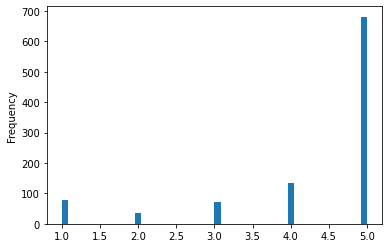

In [ ]:
#Visualizing the frequency of each star rating (overwhelming amount of 5 star ratings)

df['star_rating'].plot(bins=50, kind='hist')

In [ ]:
# Numerical representation of the star ratings available (Overwhelmingly large number of positive reviews)
df['star_rating'].value_counts()

5    681
4    133
1     79
3     71
2     36
Name: star_rating, dtype: int64

In [ ]:
df[‘star_rating’] = df[‘star_rating’].map({ 5 : ‘positive’, 2 : ‘negative’})
data.sample(3)

SyntaxError: ignored

In [ ]:
import tensorflow as tf
import numpy as np